<a href="https://colab.research.google.com/github/HopeDiane/Credit-Card-FraudDetection/blob/main/Credit_Card_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**CREDIT CARD FRAUD DETECTION SYSTEM USING RANDOM FOREST AND FASTAPI**
## Packages below imported and downloaded for visualization, manipulation, analysis.

```



In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
!pip install from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
!pip install from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


**UPLOADING DATASET INTO GOOGLE DRIVE AND DISPLAYING DATA FROM DATASET**

In [2]:
#import dataset from GoogleDrive
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1LSzlKeLpMHX3wfQch_zF-UXfYPvn1Jw8/view?usp=share_link'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('creditcard.csv')

data = pd.read_csv('creditcard.csv')

#Displaying data from the Dataset
pd.set_option('display.max.columns', None)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**MORE EDA ANALYSIS WAS DONE INCLUDING LISTING COLUMN NAMES, LISTING TOTAL NO. OF TRANSACTIONS AND PLOTTING GENUINE AND FRAUDULENT TRANSACTIONS ON A GRAPH**

In [3]:
#List dataset column names
import csv
with open('creditcard.csv') as csv_file:
 
        # reading the csv file using DictReader
    csv_reader = csv.DictReader(csv_file)
 
    # converting the file to dictionary
    # by first converting to list
    # and then converting the list to dict
    dict_from_csv = dict(list(csv_reader)[0])
 
    # making a list from the keys of the dict
    list_of_column_names = list(dict_from_csv.keys())
 
    # displaying the list of column names
    print("List of column names : ",
          list_of_column_names)

#Read Data from Dataset

Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Transactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

data.isnull().values.any()



List of column names :  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Total number of Transactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


False

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


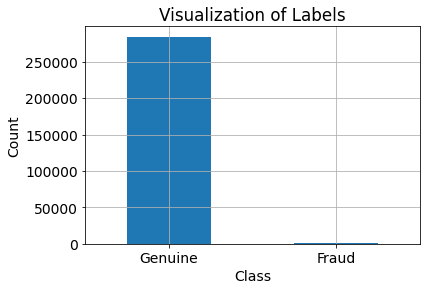

In [4]:
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

#Create A Graph with the above information
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


**DATA IS PREPARED BY SCALING THE COLUMNS, DROPPING UNNECESSARY COLUMNS AND SPLITTING THE DATASET INTO TRAINING AND TESTING DATA**




In [5]:
#Scaling Techniques on the column
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = data["Class"]
X = data.drop(["Class"], axis= 1)

#Split dataset into training and testing data
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.4, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (170884, 29)
Shape of test_X:  (113923, 29)


**TRAINING OF THE MODEL AND PRINTING THE SCORE**

In [6]:
#Lets build a Random Forest Tree
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators= 100)

#train using fit() to split different samples from the training data and predict function() to predict labels of the data values based on the trained model
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.9561107063543


**EVALUATION METRICS**

Confusion Matrix - Random Forest
[[113721     11]
 [    39    152]]
Evaluation of Random Forest Model

Accuracy: 0.99956
Precision: 0.93252
Recall: 0.79581
F1-score: 0.85876


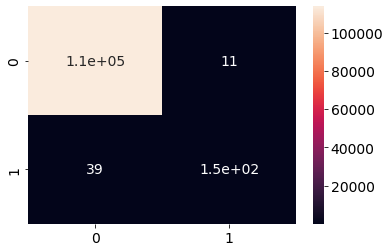

In [7]:
#print metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, plot_confusion_matrix


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions))) #combines the precision and recall 
    #of a classifier into a single metric by taking their harmonic mean

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
#plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

import seaborn as sns
sns.heatmap((confusion_matrix_rf), annot=True)

print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

#Load and save file into disk
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(random_forest, file)

**DEPLOYMENT OF THE MODEL USING FASTAPI**

In [ ]:
#Ceating an endpoint for data inputs to be received
#Creating a data class for all data inputs
!pip install pyngrok
!pip install sklearn.externals
from pydantic import BaseModel
!pip install fastapi
from fastapi import FastAPI
import pickle
from pyngrok import ngrok
import joblib


app = FastAPI(
    title="Credit Card Fraud Detection API",
    description="""An API that utilises a Machine Learning model that detects if a credit card transaction is fraudulent or not""",
    version="1.0.0", debug=True
)

class fraudDetection(BaseModel):

    v1:float
    v2:float
    v3:float
    v4:float
    v5:float
    v6:float
    v7:float
    v8:float
    v9:float
    v10:float
    v11:float
    v12:float
    v13:float
    v14:float
    v15:float
    v16:float
    v17:float
    v18:float
    v19:float
    v20:float
    v21:float
    v22:float
    v23:float
    v24:float
    v25:float
    v26:float
    v27:float
    v28:float

    amount:float	

@app.post('/predict')
def predict(data : fraudDetection):

  
    received = data.dict()
    amount = received['amount']
    v1 = received['v1']
    v2 = received['v2']
    v3 = received['v3']
    v4 = received['v4']
    v5 = received['v5']
    v6 = received['v6']
    v7 = received['v7']
    v8 = received['v8']
    v9 = received['v9']
    v10 = received['v10']
    v11 = received['v11']
    v12 = received['v12']
    v13 = received['v13']
    v14 = received['v14']
    v15 = received['v15']
    v16 = received['v16']
    v17 = received['v17']
    v18 = received['v18']
    v19 = received['v19']
    v20 = received['v20']
    v21 = received['v21']
    v22 = received['v22']
    v23 = received['v23']
    v24= received['v24']
    v25= received['v25']
    v26 = received['v26']
    v27= received['v27']
    v28= received['v28']

                                                                                                                                                                                                                                
    model = joblib.load('model.pkl')

    predictions = model.predict([[amount, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23,
                                  v24, v25, v26, v27, v28]]).tolist()[0]
    if predictions == 1:
        return {"fraudulent"}
    elif predictions == 0:
        return {"not fraudulent"}

#Using ColabCode to run server 
!pip install ColabCode
from colabcode import ColabCode
server = ColabCode(port=8000, code=False)

!ngrok authtoken 2J2MYtbgYT7Usf6fhnIYiQfG4aG_8qj4EgsFpJ9XWSDAokbJ
server.run_app(app=app)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.externals (from versions: none)
ERROR: No matching distribution found for sklearn.externals
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


INFO:     Started server process [63908]
INFO:uvicorn.error:Started server process [63908]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://cef6-35-192-166-47.ngrok.io" -> "http://localhost:8000"
INFO:     41.90.35.219:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     41.90.35.219:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     41.90.35.219:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     41.90.35.219:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     41.90.35.219:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     41.90.35.219:0 - "POST /predict HTTP/1.1" 200 OK
